In [1]:
info = {
 "title": "Christmas Pudding",
 "author": "Alex Carney",
 "github_username": "alcarney",
 "stylo_version": "0.9.0",
 "dimensions": (1080, 1080)
}

In [2]:
import numpy as np
from math import pi

from stylo.domain.transform import translate, rotate
from stylo.shape import Circle, Shape
from stylo.color import FillColor
from stylo.image import LayeredImage

In [3]:
pudding = FillColor("444400")
darkgreen = FillColor("004400")
white = FillColor("ffffff")
darkred = FillColor("cc0000")
red = FillColor("dd0000")

In [4]:
class Topping(Shape):
    
    def draw(self):
                
        def topping(x, y):
            
            s1 = 0.1*np.cos(3.7*x*pi)
            s2 = 0.07*np.sin(8*(x-0.23)*pi)
            s3 = 0.2*np.sin(7*(x - 0.45)*pi)

            a = y*2 > 0.6 + s3 + s1 + s2
            
            return a
        
        return topping

In [5]:
class Leaf(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale

    def draw(self):
        
        y1 = 1.3
        y2 = 1.2
        y3 = 1
        
        x1 = 1
        x2 = 1.8
        
        c1 = Circle(y=y1, r=0.6, fill=True)
        c2 = Circle(y=-y1, r=0.6, fill=True)
        
        c3 = Circle(x=x1, y=-y2, r=0.6, fill=True)
        c4 = Circle(x=-x1, y=-y2, r=0.6, fill=True)
        c5 = Circle(x=x1, y=y2, r=0.6, fill=True)
        c6 = Circle(x=-x1, y=y2, r=0.6, fill=True)
        
        c7 = Circle(x=x2, y=-y3, r=0.6, fill=True)
        c8 = Circle(x=-x2, y=-y3, r=0.6, fill=True)
        c9 = Circle(x=x2, y=y3, r=0.6, fill=True)
        c10 = Circle(x=-x2, y=y3, r=0.6, fill=True)
        
        def leaf(x, y):
            
            x = x/self.scale
            y = y/self.scale
            
            xs = x / 2.5
            
            above = y > xs*xs - 1
            below = y < 1 - xs*xs
            
            leaf = np.logical_and(above, below)
            
            c = np.logical_or(c1(x=x, y=y), c2(x=x, y=y))
            c = np.logical_or(c3(x=x, y=y), c)
            c = np.logical_or(c4(x=x, y=y), c)
            c = np.logical_or(c5(x=x, y=y), c)
            c = np.logical_or(c6(x=x, y=y), c)
            c = np.logical_or(c7(x=x, y=y), c)
            c = np.logical_or(c8(x=x, y=y), c)
            c = np.logical_or(c9(x=x, y=y), c)
            c = np.logical_or(c10(x=x, y=y), c)
            
            cutouts = np.logical_not(c)
            
            #return cutouts
            return np.logical_and(leaf, cutouts)
        
        return leaf

In [6]:
pudding_shape = Circle(r=0.8, fill=True)
topping = Circle(r=0.8, fill=True) & Topping()

cherries = Circle(y=0.8, r=0.06, fill=True) |\
           Circle(y=0.72, x=0.08, r=0.06, fill=True) |\
           Circle(y=0.72, x=-0.08, r=0.06, fill=True)

holly1 = Leaf(scale=0.2) >> rotate(pi/4) >> translate(-0.35, 1.1)
holly2 = Leaf(scale=0.2) >> rotate(-pi/6) >> translate(0.45, 1)

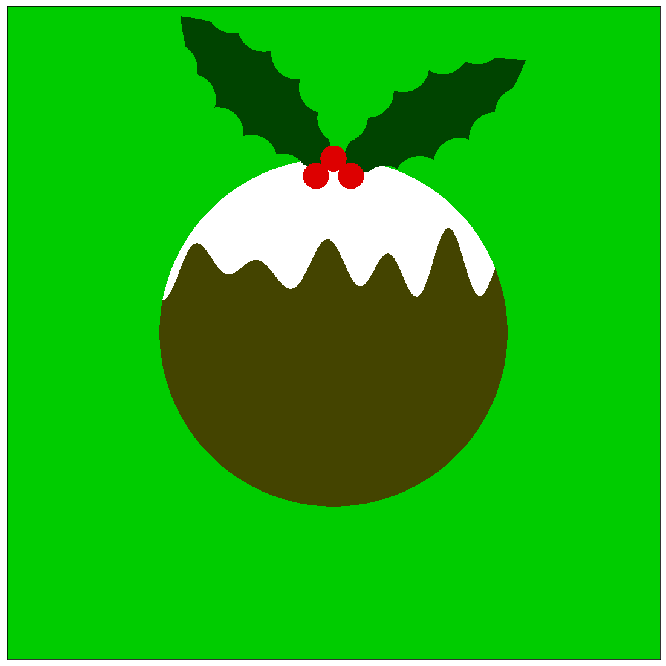

In [7]:
image = LayeredImage(background="00cc00", scale=3)

image.add_layer(pudding_shape, pudding)
image.add_layer(topping, white)

image.add_layer(holly1, darkgreen)
image.add_layer(holly2, darkgreen)


image.add_layer(cherries, red)


image(1080, 1080)